In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
from importlib import reload
from model import features, pipeline, classifier, plotlib
reload(features)

<module 'model.features' from '/Users/akhlak/Library/CloudStorage/Dropbox/work-Proj/Proj-UV-GNR-ML/code/model/features.py'>

In [2]:
# Add fonts to matplotlib cache.
import matplotlib
from pathlib import Path
for path in Path("../../../common/fonts/").rglob('*.otf'):
    matplotlib.font_manager.fontManager.addfont(str(path))

In [24]:
plt.style.use("matplotlib.mplstyle")

In [4]:
data = pd.read_csv("../Data/imputed_data.mice.csv")
data = data.assign(coating = data[['lobe', 'full', 'other']].idxmax(axis=1))
data = data.assign(coatingId = data.coating.replace(data.coating.unique(),
                                                    range(len(data.coating.unique()))))

# Save the classes for verification
df = data[data.imp == 1].set_index('name')[['imp', 'coatingId', 'full', 'lobe', 'other', 'coating']]
df.to_csv("../Data/imputed_data.classes.csv")

In [5]:
dobs = data[data.imp == 0].dropna()
dimp = data[data.imp == 1]

## Distribution of classes

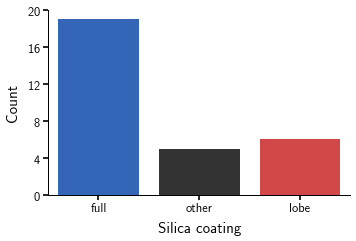

In [37]:
fig, ax = plt.subplots(figsize=(3.25, 2.0))
sns.countplot(x=data[data.imp == 0].coating, ax = ax)
ax.set(yticks = range(0, 21, 4), ylabel = 'Count')
plt.minorticks_off()
plt.xlabel("Silica coating")
plt.savefig("../Plots/x8_class_counts.png")
plt.show()

## JitterPlot - Feature relationships with classes

In [154]:
def plot_class_scatter(df, cols, by, name):
    height = len(cols)*0.6
    if height < 1.8:
        height = 1.8
    fig, ax = plt.subplots(len(cols), 1, figsize=(2.66, height))
    for i, col in enumerate(cols):
        if col == by: continue
        sns.scatterplot(data=df, x=col, y = np.random.normal(i, 0.1, size=df.shape[0]), hue = by, ax = ax[i])
        ax[i].legend([],[], frameon=False)
        ax[i].set(yticks=[], xlabel="", ylim = (i-1, i+1))
        ax[i].set_ylabel(col)

    ax[0].legend(loc=(.02, 1.01), ncol=3, frameon=False, columnspacing=0.5)
    # plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(name)
    print("Save OK:", name, "Height:", height)
    plt.show()

Save OK: ../Plots/x8_class_scatter_teos.png Height: 1.8


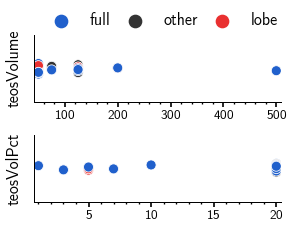

Save OK: ../Plots/x8_class_scatter_gold.png Height: 2.4


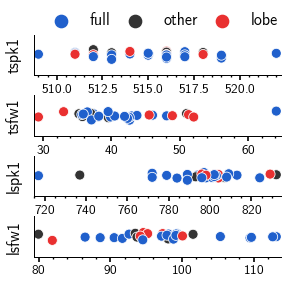

Save OK: ../Plots/x8_class_scatter_reac.png Height: 2.4


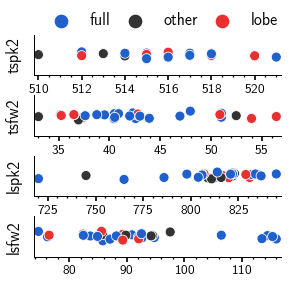

Save OK: ../Plots/x8_class_scatter_pure.png Height: 2.4


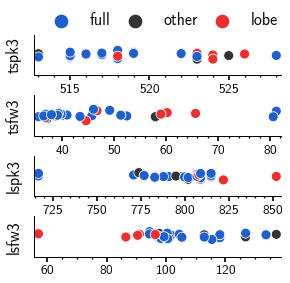

In [155]:
df = dimp.set_index('name')
plot_class_scatter(df, ['teosVolume', 'teosVolPct'], 'coating',
                   name = "../Plots/x8_class_scatter_teos.png")
plot_class_scatter(df, ['tspk1', 'tsfw1', 'lspk1', 'lsfw1'], 'coating',
                   name = "../Plots/x8_class_scatter_gold.png")
plot_class_scatter(df, ['tspk2', 'tsfw2', 'lspk2', 'lsfw2'], 'coating',
                   name = "../Plots/x8_class_scatter_reac.png")
plot_class_scatter(df, ['tspk3', 'tsfw3', 'lspk3', 'lsfw3'], 'coating',
                   name = "../Plots/x8_class_scatter_pure.png")

## JitterPlot - Shifted feats relationships

Save OK: ../Plots/x8_class_scatter_reac_shifts.png Height: 3.5999999999999996


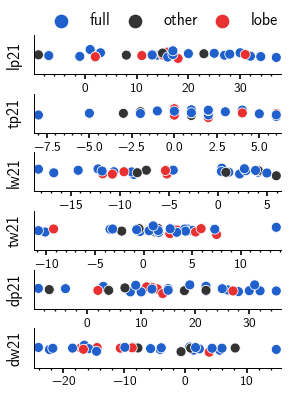

Save OK: ../Plots/x8_class_scatter_pure_shifts.png Height: 3.5999999999999996


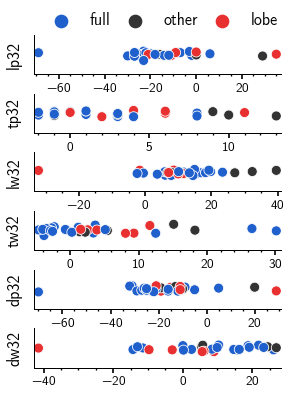

Save OK: ../Plots/x8_class_scatter_total_shifts.png Height: 3.5999999999999996


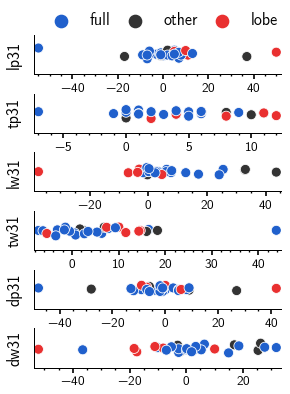

In [156]:
df = dimp.set_index('name')
ml = pipeline.Pipeline(df)
ml.AddFeatures([features.Differences], show_list=False)
df = ml.Tr
cols = df.columns[df.columns.str.contains('21')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_reac_shifts.png")
cols = df.columns[df.columns.str.contains('32')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_pure_shifts.png")
cols = df.columns[df.columns.str.contains('31')]
plot_class_scatter(df, cols, 'coating',
                   name = "../Plots/x8_class_scatter_total_shifts.png")

# BoxPlots - Feature Relationships with Classes

In [157]:
def plot_class_boxplots(df, cols, by, name):
    n = len(cols)
    if n == 2:
        r = 1
        c = 2
    elif n == 4:
        r = 2
        c = 2
    elif n == 6:
        r = 2
        c = 3
    else:
        c = 3
        r = n // c
    height = 1.2
    if r > 1:
        height = r * 1.0
    fig = plt.figure(figsize = (2*c, height))
    for i in range(n):
        col = cols[i]
        ax = fig.add_subplot(r, c, i+1)
        sns.boxplot(x = by, y = col, data = df, linewidth=0.6)
        ax.set_xlabel('')

    plt.tight_layout()
    plt.savefig(name)
    print("Save OK:", name, "Height:", height)
    plt.show()

# BoxPlots - Property Specific

Save OK: ../Plots/x8_class_boxplot_teos.png Height: 1.2


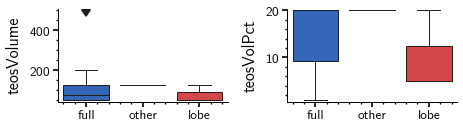

Save OK: ../Plots/x8_class_boxplot_lspr.png Height: 4.0


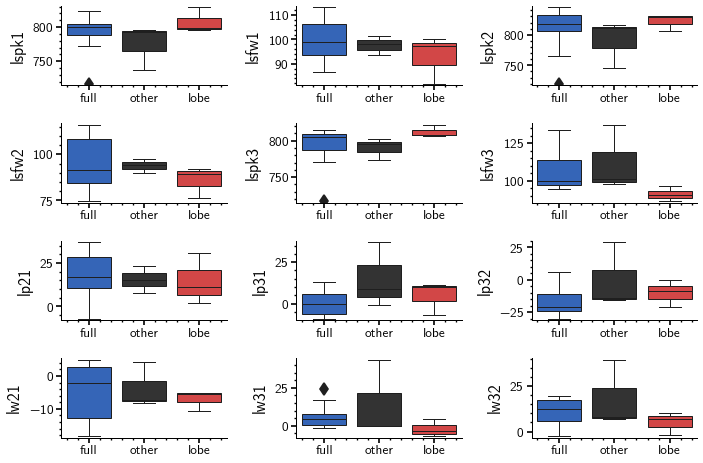

Save OK: ../Plots/x8_class_boxplot_tspr.png Height: 4.0


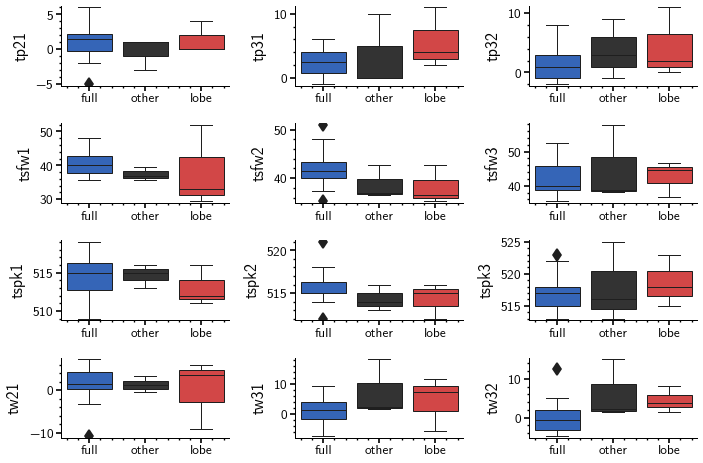

In [158]:
df = dobs.set_index('name')
ml = pipeline.Pipeline(df)
ml.AddFeatures([features.Differences], show_list=False)
df = ml.Tr.drop(['lobe', 'full', 'other'], axis=1)
cols = df.columns[df.columns.str.startswith('teos')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_teos.png")
cols = df.columns[df.columns.str.startswith('l')]
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_lspr.png")
cols = df.columns[df.columns.str.startswith('t')].difference(['teosVolume', 'teosVolPct'])
plot_class_boxplots(df, cols, 'coating',
                   name = "../Plots/x8_class_boxplot_tspr.png")


# Split Dataset

In [21]:
# Sample 6 data points for testing
testIds = data[data.imp == 0].dropna().id.sample(n=6)
print("Test Row IDs:", testIds.values)

# Separate test and training data
testdf = data[data.imp == 0].loc[lambda df: df.id.isin(testIds)]
traindf = data.loc[lambda df: ~df.id.isin(testIds)].dropna()

# List of imputed dataframes
impdfs = [traindf[traindf.imp == i] for i in traindf.imp.unique()]

# Show the testdf
testdf.coating

Test Row IDs: [ 7  4 14 26 16 24]


3      full
6      full
13    other
15     lobe
23     full
25     lobe
Name: coating, dtype: object

# Select features

In [60]:
ycol = "coating"

# Build a list of non-collinear features
fnAgg = [features.Differences, features.InverseDifferences]
df = data[data.imp == 0].dropna().drop(['imp', 'id', 'coatingId'], axis=1).set_index('name')

ml = pipeline.Pipeline(df)
ml.AddFeatures(fnAgg, show_list=False)
feats = ml.NonCollinearFeatures(keepCols=['teosVolPct', 'teosVolume'],
                                ignoreCols=['lobe', 'full', 'other', 'quality', 'coating'])
xcols = list(feats.columns)
print("Selected features:", xcols)

feats.to_csv("../Data/x8_selected_feats.csv")

Selected features: ['lsfw2', 'lsfw1', 'tspk2', 'tsfw2', 'itp32', 'tsfw1', 'tspk1', 'teosVolume', 'itw32', 'lp31', 'lspk1', 'lw32', 'teosVolPct', 'ilp21']


# Classifiers/Algorithms

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import kernels, GaussianProcessClassifier

# list of tuples of algorithm, gridsearch, and hyperparam space
algorithms = [
    (KNeighborsClassifier, True, dict(
        # The optimal value depends on the nature of the problem
        leaf_size = np.linspace(1, 100, num = 10).astype(int),
        
        # Number of neighbors to use
        n_neighbors = np.linspace(1, 10, num = 10).astype(int),
        
        # Weight function used in prediction
        weights = ['uniform', 'distance'],
        
        # Algorithm used to compute the nearest neighbors
        algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute'],
        
        # manhattan_distance (l1) or euclidean_distance (l2)
        p=[1, 2],
        
        # Parallel processing
        n_jobs = [-1],
    )),
    (SVC, True, dict(
        C=np.linspace(0.001, 1, num=10),
        kernel=['rbf', 'poly', 'linear'],
    )),
    (RandomForestClassifier, False, dict(
        # Number of trees in random forest
        n_estimators = [int(x) for x in np.linspace(1, 200, num = 10)],

        # Maximum number of levels in tree
        max_depth = [int(x) for x in np.linspace(1, 10)] + [None],

        # Minimum number of samples required to split a node
        min_samples_split = [1, 2],

        # Minimum number of samples required at each leaf node
        min_samples_leaf = [1, 2, 4],

        # Method of selecting samples for training each tree
        bootstrap = [True, False],
        
        # Parallel processing
        n_jobs = [-1],
    )),
    (GaussianProcessClassifier, False, dict(
        kernel = [kernels.RBF(), kernels.RBF() + kernels.WhiteKernel()],
        n_restarts_optimizer = [1, 2, 5],
        max_iter_predict = [10, 100, 1000],
        warm_start = [True, False],
        multi_class = ['one_vs_rest', 'one_vs_one'],
        n_jobs = [-1],
    ))
]

In [65]:
reload(plotlib)
reload(features)
reload(pipeline)
reload(classifier)

<module 'model.classifier' from '/Users/akhlak/Library/CloudStorage/Dropbox/work-Proj/Proj-UV-GNR-ML/code/model/classifier.py'>

In [70]:
def test_algorithm(alg, gridSearch, hyperParams, cv,
                   Tr, ycol, fnAgg, Ts, name, xcols,
                   featsearch = None):
    """ Perform hyperparam tuning and testing on a given algorithm. """    
    if featsearch is None:
        # use the given features
        clf = alg()
        ml = classifier.New(Tr, xcols, ycol, fnAgg)
        ml.FitModel(clf)
    else:
        # add the featsearch items to the xcols
        clf = alg()
        ml = classifier.New(Tr, featsearch, ycol, fnAgg)
        ml.FitModel(clf)

        # Find the best features
        xcols = ml.FeatureSearch('f1_weighted', 'backward', cv, Ts, 0.2)

        # Create new model with the features
        clf = alg()
        ml = classifier.New(Tr, xcols, ycol, fnAgg)
        ml.FitModel(clf)
    
    # Find the best hyperparams, with k fold CV
    best = ml.HypParamSearch(hyperParams, 'f1_weighted', gridSearch, cv, Ts)
    
    print('best hyperparameters:\n', best.best_params_)
    
    clf = alg(**best.best_params_)
    ml = classifier.New(Tr, xcols, ycol, fnAgg)
    ml.FitModel(clf)
    ml.Report(Ts)
    ml.Confusion(Ts, savePrefix="../Plots/x8_conf.%s" %name)
    return best.best_params_, xcols

# Data Classification

Fitting coating = KNeighborsClassifier() ... OK
Running features search ... OK
best features: ['tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32', 'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33', 'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32', 'ilp21', 'ilp31', 'ilp32', 'itp21', 'itp31', 'itp32', 'ilw21', 'ilw31', 'ilw32', 'itw21', 'itw31', 'itw32', 'idp11', 'idp22', 'idp33', 'idp21', 'idp31', 'idp32', 'idw11', 'idw22', 'idw33', 'idw21', 'idw31', 'idw32']
Fitting coating = KNeighborsClassifier() ... OK
Running grid search ... OK
best score: 0.6244019138755981
best hyperparameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Fitting coating = KNeighborsClassifier() ... OK
              precision    recall  f1-score   support

        full       0.50      1.00    

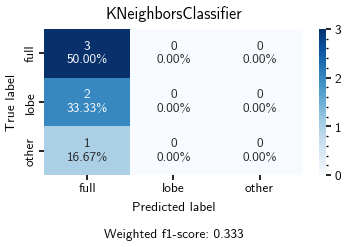

Fitting coating = SVC() ... OK
Running features search ... OK
best features: ['tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32', 'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33', 'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32', 'ilp21', 'ilp31', 'ilp32', 'itp21', 'itp31', 'itp32', 'ilw21', 'ilw31', 'ilw32', 'itw21', 'itw31', 'itw32', 'idp11', 'idp22', 'idp33', 'idp21', 'idp31', 'idp32', 'idw11', 'idw22', 'idw33', 'idw21', 'idw31', 'idw32']
Fitting coating = SVC() ... OK
Running grid search ... OK
best score: 0.6294524189261033
best hyperparameters:
 {'C': 0.001, 'kernel': 'poly'}
Fitting coating = SVC() ... OK
              precision    recall  f1-score   support

        full       0.50      0.67      0.57         3
        lobe       0.00      0.00      0.00         2
       other       0.00      0.00      0.00       

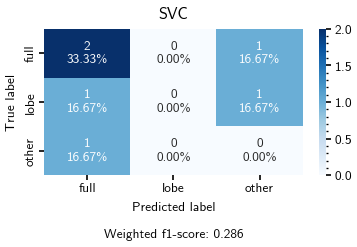

Fitting coating = RandomForestClassifier() ... OK
Running features search ... OK
best features: ['tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct', 'lp21', 'lp31', 'lp32', 'tp21', 'tp31', 'tp32', 'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp22', 'dp33', 'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32', 'ilp21', 'ilp31', 'ilp32', 'itp21', 'itp31', 'itp32', 'ilw21', 'ilw31', 'ilw32', 'itw21', 'itw31', 'itw32', 'idp11', 'idp22', 'idp33', 'idp21', 'idp31', 'idp32', 'idw11', 'idw22', 'idw33', 'idw21', 'idw31', 'idw32']
Fitting coating = RandomForestClassifier() ... OK
Running randomized search ... OK
best score: 0.6428995840760547
best hyperparameters:
 {'n_jobs': -1, 'n_estimators': 89, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3, 'bootstrap': False}
Fitting coating = RandomForestClassifier() ... OK
              precision    recall  f1-score   support

       

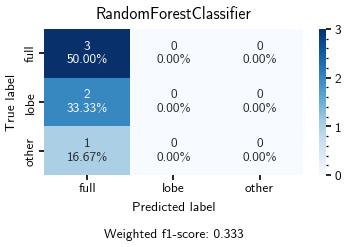

Fitting coating = GaussianProcessClassifier() ... OK
Running features search ... OK
best features: ['tspk1', 'tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3', 'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct', 'lp21', 'lp31', 'lp32', 'tp31', 'tp32', 'lw21', 'lw31', 'lw32', 'tw21', 'tw31', 'tw32', 'dp11', 'dp22', 'dp33', 'dp21', 'dp31', 'dp32', 'dw11', 'dw22', 'dw33', 'dw21', 'dw31', 'dw32', 'ilp21', 'ilp31', 'ilp32', 'itp21', 'itp31', 'itp32', 'ilw21', 'ilw31', 'ilw32', 'itw21', 'itw31', 'itw32', 'idp11', 'idp22', 'idp33', 'idp21', 'idp31', 'idp32', 'idw11', 'idw22', 'idw33', 'idw21', 'idw31', 'idw32']
Fitting coating = GaussianProcessClassifier() ... OK
Running randomized search ... 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom

OK
best score: 0.6577352472089315
best hyperparameters:
 {'warm_start': True, 'n_restarts_optimizer': 2, 'n_jobs': -1, 'multi_class': 'one_vs_rest', 'max_iter_predict': 10, 'kernel': RBF(length_scale=1)}
Fitting coating = GaussianProcessClassifier() ... 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/homebrew/

OK
              precision    recall  f1-score   support

        full       0.50      1.00      0.67         3
        lobe       0.00      0.00      0.00         2
       other       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.17      0.33      0.22         6
weighted avg       0.25      0.50      0.33         6

Save OK: ../Plots/x8_conf.obs.GaussianProcessClassifier.png


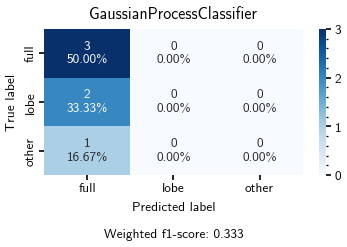

[(sklearn.neighbors._classification.KNeighborsClassifier,
  {'algorithm': 'auto',
   'leaf_size': 1,
   'n_jobs': -1,
   'n_neighbors': 3,
   'p': 1,
   'weights': 'distance'},
  Index(['tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3',
         'tsfw3', 'lspk3', 'lsfw3', 'teosVolume', 'teosVolPct', 'lp21', 'lp31',
         'lp32', 'tp21', 'tp31', 'tp32', 'lw21', 'lw31', 'lw32', 'tw21', 'tw31',
         'tw32', 'dp11', 'dp22', 'dp33', 'dp21', 'dp31', 'dp32', 'dw11', 'dw22',
         'dw33', 'dw21', 'dw31', 'dw32', 'ilp21', 'ilp31', 'ilp32', 'itp21',
         'itp31', 'itp32', 'ilw21', 'ilw31', 'ilw32', 'itw21', 'itw31', 'itw32',
         'idp11', 'idp22', 'idp33', 'idp21', 'idp31', 'idp32', 'idw11', 'idw22',
         'idw33', 'idw21', 'idw31', 'idw32'],
        dtype='object')),
 (sklearn.svm._classes.SVC,
  {'C': 0.001, 'kernel': 'poly'},
  Index(['tsfw1', 'lspk1', 'lsfw1', 'tspk2', 'tsfw2', 'lspk2', 'lsfw2', 'tspk3',
         'tsfw3', 'lspk3', 'lsfw3', 'teosVolum

In [69]:
df = traindf[traindf.imp == 0].dropna()
name = 'obs'
cv = 2

ml = pipeline.Pipeline(df)
ml.AddFeatures(fnAgg, show_list=False)
x0 = ml.Tr.columns.drop([
    'imp', 'id', 'quality', 'lobe', 'full', 'other', 'coating', 'coatingId', 'name'])

bestAlg = []
for alg in algorithms:
    h, f = test_algorithm(alg[0], alg[1], alg[2], cv,
                   df, ycol, fnAgg, testdf, name, xcols, featsearch=x0)
    bestAlg.append((alg[0], h, f))

bestAlg